In [1]:
import os 
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'cnn-time-stack.ipynb',
 'DataCleaning.ipynb',
 'feature select.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'README.md',
 'tag盤點表.xlsx',
 'target.jpg',
 'train.csv',
 'train_FeatureSelected.csv',
 'xgboost.ipynb',
 '南亞PA廠資料分析_R6_1219.ipynb']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(122774, 16)


,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0716A05,MLPAP_TI-0716A10,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0762A1.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TIC-1721.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,-1.063656,-0.881876,0.436522,0.448320,0.250624,10.862927,0.796892,3.036418,-4.444046,3.099350,-2.620349,-7.954421,-4.023225,-1.012546,-0.088237,0.914125
2016-05-10 08:20:00,-1.063656,-0.881876,0.436522,0.448320,0.250624,10.895595,0.797109,2.863638,-4.435347,3.272202,-2.615166,-7.929338,-4.029503,-0.979549,-0.088237,0.919765
2016-05-10 08:30:00,-1.063656,-0.881876,0.436832,0.448320,0.250624,10.915349,0.797007,3.006192,-4.445760,3.596146,-2.617471,-7.933726,-4.017335,-0.973227,-0.088237,0.926346
2016-05-10 23:40:00,-1.741703,-1.506409,0.411823,0.468479,0.225612,9.160618,0.763807,1.710473,-3.055443,3.361722,-2.612923,-6.819627,-2.798058,-0.838001,-0.088237,0.906781
2016-05-10 23:50:00,-1.741703,-1.441295,0.412133,0.468479,0.225612,9.177640,0.764321,1.822236,-3.043572,3.029452,-2.621043,-6.875791,-2.799185,-0.866150,-0.088237,0.926688


# split

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

# fit

In [5]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

model = XGBRegressor(objective="reg:squarederror")
model.fit(X_train, y_train)

C:\Users\skywalker0803r\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# eval

In [6]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))
print(round(mean_squared_error(y_test,y_pred),4))

0.3728091802255675
0.0001


# plot

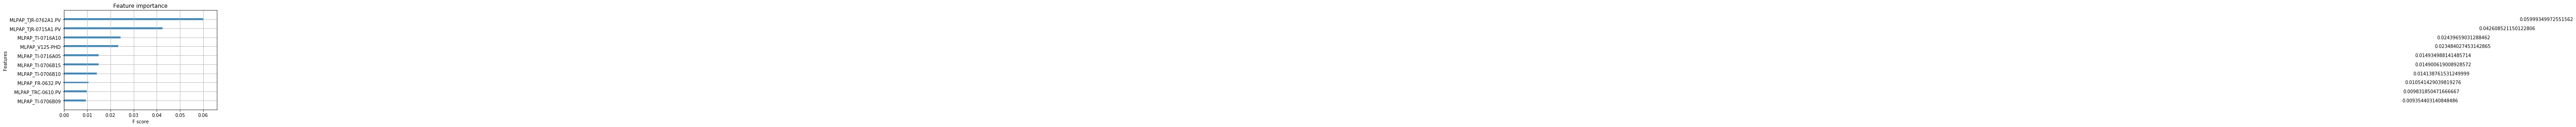

In [7]:
import xgboost
xgboost.plot_importance(model,max_num_features=10,importance_type="gain")
plt.show()

In [8]:
chmap = pd.read_excel('tag盤點表.xlsx')[['TAG','chinese']]
chmap = dict(zip(chmap['TAG'],chmap['chinese']))

In [9]:
FIMP = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['imp'])
FIMP['中文'] = FIMP.index.map(chmap)
FIMP = FIMP.sort_values(by='imp',ascending=False)
FIMP[['中文','imp']].head(10).style.background_gradient()

,中文,imp
MLPAP_TJR-0762A1.PV,鹽浴溫度,0.234281
MLPAP_TJR-0715A1.PV,反應槽溫度_多點式(高度 2450),0.166391
MLPAP_TI-0716A10,nan,0.0952712
MLPAP_V125-PHD,粗PA儲槽PHD,0.0917075
MLPAP_TI-0716A05,nan,0.0583226
MLPAP_TI-0706B15,反應槽溫度_多點式(高度 1550),0.0581884
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.0552133
MLPAP_FR-0632.PV,汽機風量,0.0411653
MLPAP_TRC-0610.PV,空氣預熱器出口溫度,0.0383944
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.0365299


In [10]:
y_pred = pd.Series(y_pred,name='y_pred',index=y_test.index)
y_pred = y_pred.sort_index()
y_test = y_test.sort_index()

# plot

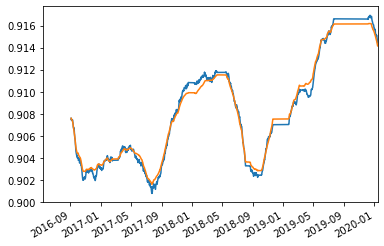

In [11]:
y_test.rolling(6*24*15).mean().plot()
y_pred.rolling(6*24*15).mean().plot()